In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로
path = '/content/drive/MyDrive/dacon/2023.11.15/dataset'

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and direc

In [5]:
plt.rc('font', family='NanumBarunGothic')

In [6]:
# 데이터 불러오기

orig = pd.read_csv(path + '/train.csv')
df = pd.read_csv(path + '/train.csv')
t_df = pd.read_csv(path + '/test.csv')

In [7]:
# 데이터 살펴보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [8]:
# 유효성 검사 함수

def making_val_table(df):
    '''입력받은 데이터셋의 유효성 검증을 위한 요약 테이블'''
    # dtypes
    df_dtypes = df.dtypes

    # nunique
    df_nunique = df.nunique()

    # null_values
    df_nan = df.isna().sum()

    val_table = pd.concat([df_dtypes, df_nunique, df_nan], axis=1)
    val_table.columns = ['dtype', 'nunique', 'nan']

    return val_table.reset_index()

In [9]:
m_df = making_val_table(df)
m_t_df = making_val_table(t_df)

In [10]:
m_df

,index,dtype,nunique,nan
0,ID,object,39609,0
1,사고일시,object,18057,0
2,요일,object,7,0
3,기상상태,object,6,0
4,시군구,object,199,0
5,도로형태,object,11,0
6,노면상태,object,6,0
7,사고유형,object,3,0
8,사고유형 - 세부분류,object,14,0
9,법규위반,object,11,0


In [11]:
m_t_df

,index,dtype,nunique,nan
0,ID,object,10963,0
1,사고일시,object,5548,0
2,요일,object,7,0
3,기상상태,object,5,0
4,시군구,object,192,0
5,도로형태,object,11,0
6,노면상태,object,6,0
7,사고유형,object,3,0


In [12]:
# Feature Engineering

y = df['ECLO']

# 테스트셋의 컬럼만 사용
df = df[t_df.columns]

In [13]:
# ID drop

df.drop(['ID'] , axis = 1 , inplace = True)
t_df.drop(['ID'] , axis = 1 , inplace = True)

In [14]:
df['사고일시'] = pd.to_datetime(df['사고일시'])
t_df['사고일시'] = pd.to_datetime(t_df['사고일시'])

In [15]:
df.head(3)

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람
1,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람
2,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람


In [16]:
df['월'] = df['사고일시'].dt.month
df['일'] = df['사고일시'].dt.day
df['시'] = df['사고일시'].dt.hour

df.drop(['사고일시'] , axis = 1 , inplace = True)

t_df['월'] = t_df['사고일시'].dt.month
t_df['일'] = t_df['사고일시'].dt.day
t_df['시'] = t_df['사고일시'].dt.hour

t_df.drop(['사고일시'] , axis = 1 , inplace = True)

In [17]:
gun = []
for i in range(len(df)):
    gun.append(df['시군구'].iloc[i].split()[1])

gu = []
for i in range(len(df)):
    gu.append(df['시군구'].iloc[i].split()[2])

df['군'] = gun
df['구'] = gu

gun = []
for i in range(len(t_df)):
    gun.append(t_df['시군구'].iloc[i].split()[1])

gu = []
for i in range(len(t_df)):
    gu.append(t_df['시군구'].iloc[i].split()[2])

t_df['군'] = gun
t_df['구'] = gu

In [18]:
# 시군구 삭제

df.drop(['시군구'] , axis = 1 , inplace = True)
t_df.drop(['시군구'] , axis = 1 , inplace = True)

In [21]:
df

,요일,기상상태,도로형태,노면상태,사고유형,월,일,시,군,구
0,화요일,맑음,단일로 - 기타,건조,차대사람,1,1,0,중구,대신동
1,화요일,흐림,단일로 - 기타,건조,차대사람,1,1,0,달서구,감삼동
2,화요일,맑음,단일로 - 기타,건조,차대사람,1,1,1,수성구,두산동
3,화요일,맑음,단일로 - 기타,건조,차대차,1,1,2,북구,복현동
4,화요일,맑음,단일로 - 기타,건조,차대차,1,1,4,동구,신암동
...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,교차로 - 교차로안,건조,차대차,12,31,19,수성구,수성동3가
39605,금요일,맑음,단일로 - 기타,건조,차대차,12,31,19,달서구,상인동
39606,금요일,맑음,교차로 - 교차로안,건조,차대차,12,31,21,달서구,월성동
39607,금요일,맑음,기타 - 기타,건조,차대차,12,31,22,달서구,장동


In [20]:
def one_hot(data , t_data , col):
    oh = pd.get_dummies(data[col])
    oh_t = pd.get_dummies(t_data[col])

    data = pd.concat([data , oh] , axis = 1)
    t_data = pd.concat([t_data , oh_t] , axis = 1)

    data.drop([col] , axis = 1 , inplace = True)
    t_data.drop([col] , axis = 1 , inplace = True)

    return data , t_data

In [22]:
# 요일 인코딩

df , t_df = one_hot(df , t_df , '요일')

In [23]:
# 기상상태 인코딩

df , t_df = one_hot(df , t_df , '기상상태')

In [24]:
# 도로형태 인코딩

df , t_df = one_hot(df , t_df , '도로형태')

In [25]:
# 노면상태 인코딩

df , t_df = one_hot(df , t_df , '노면상태')

In [26]:
# 사고유형

df , t_df = one_hot(df , t_df , '사고유형')

In [27]:
# 군

df , t_df = one_hot(df , t_df , '군')

In [28]:
df.drop(['구'] , axis = 1 , inplace = True)
t_df.drop(['구'] , axis = 1 , inplace = True)

In [29]:
df.drop(['안개'] , axis = 1 , inplace = True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

trainX , testX , trainY , testY = train_test_split(df , y , test_size = 0.3 , random_state = 42)

In [32]:
baseline = LinearRegression()

baseline.fit(trainX , trainY)

LinearRegression()

In [33]:
from sklearn import metrics

predict = baseline.predict(testX)

print(f"RMSLE : {np.sqrt(metrics.mean_squared_log_error(testY , predict))}")

RMSLE : 0.4646711399148337


In [34]:
coef_data = pd.Series(
    baseline.coef_ ,
    index = trainX.columns
)

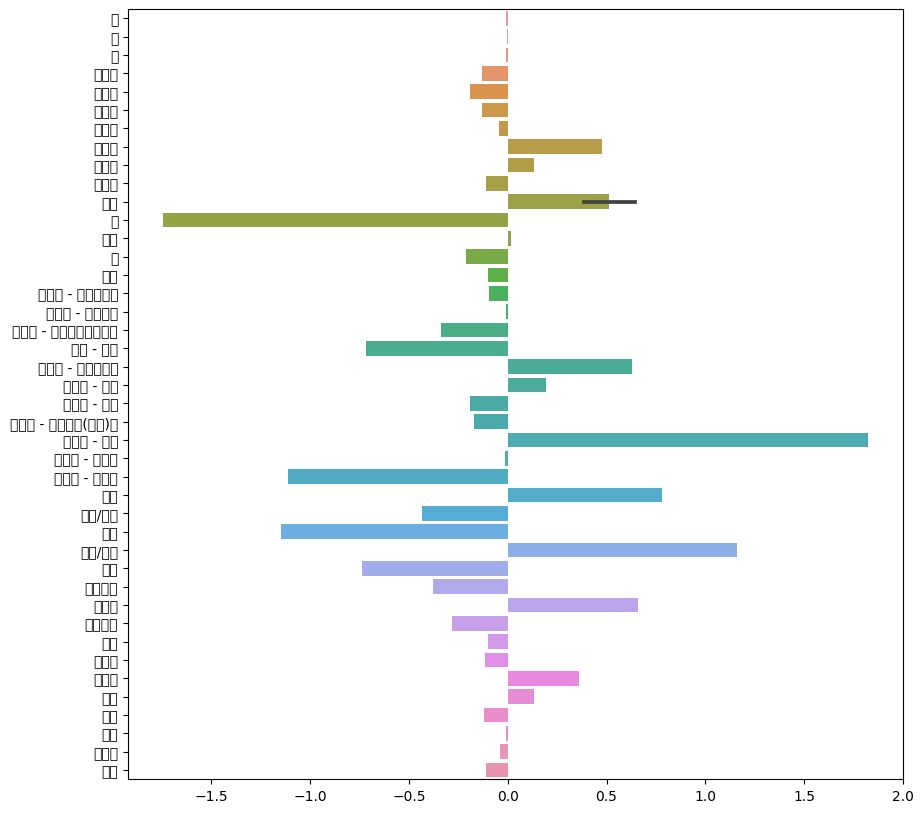

In [35]:
plt.figure(figsize = (10 , 10))

g = sns.barplot(
    x = coef_data.values ,
    y = coef_data.index
)

plt.savefig('Feature Importance')

In [36]:
# 제출

submission = pd.read_csv(path + '/sample_submission.csv')
submission

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0
...,...,...
10958,ACCIDENT_50567,0
10959,ACCIDENT_50568,0
10960,ACCIDENT_50569,0
10961,ACCIDENT_50570,0


In [37]:
test_predict = baseline.predict(t_df)
submission['ECLO'] = test_predict
submission.head(3)

,ID,ECLO
0,ACCIDENT_39609,4.386739
1,ACCIDENT_39610,4.206046
2,ACCIDENT_39611,5.403637


In [38]:
submission.to_csv(path + '/submission.csv' , index = False)